#  6.4 Supervised Machine Learning: Regression

##  This script contains the following:

###  1.  Importing libraries and data

###  2.  Data cleaning

###  3.  Data prep for regression analysis

###  4.  Regression analysis

##  Hypothesis:  If a country has a high Economy (GDP per Capita) score, then the country will have a high Happiness Score.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
%matplotlib inline

In [3]:
# Creating path
path = r'/Users/andrewruhnow/Documents/World Happiness Report 2015-2019'

In [4]:
path

'/Users/andrewruhnow/Documents/World Happiness Report 2015-2019'

In [5]:
# Importing data
df_happiness = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Happiness_merged_all_years.pkl'))

In [6]:
df_happiness.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


In [7]:
df_happiness.shape

(782, 10)

#  2.  Data cleaning

In [9]:
# Checking for mixed data types 
df_happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        782 non-null    object 
 1   Happiness Rank                 782 non-null    int64  
 2   Happiness Score                782 non-null    float64
 3   Economy (GDP per Capita)       782 non-null    float64
 4   Family                         782 non-null    float64
 5   Health (Life Expectancy)       782 non-null    float64
 6   Freedom                        782 non-null    float64
 7   Trust (Government Corruption)  781 non-null    float64
 8   Generosity                     782 non-null    float64
 9   Year                           782 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 61.2+ KB


####  No mixed data types in dataframe

In [10]:
# Checking for missing values
df_happiness.isnull().sum()

Country                          0
Happiness Rank                   0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    1
Generosity                       0
Year                             0
dtype: int64

####  Only 1 missing value and doesn't represent category being used for analysis

In [11]:
# Checking for duplicates
df_happiness.duplicated().sum()

0

####  No duplicates in dataframe

/var/folders/qg/tbv61t9j3ngdmw6m2qtbk34w0000gn/T/ipykernel_4753/3688110249.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_happiness['Economy (GDP per Capita)'], bins=25)
/Users/andrewruhnow/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Economy (GDP per Capita)', ylabel='Density'>

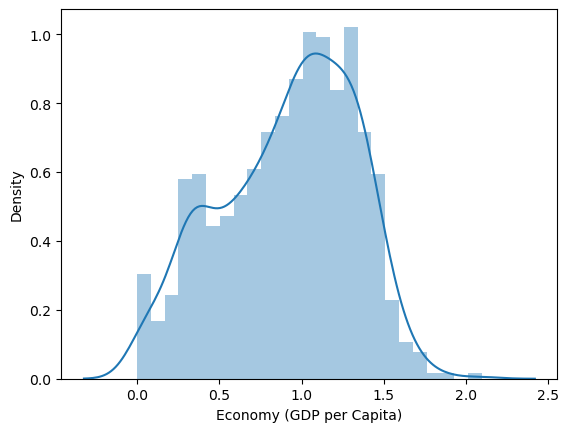

In [13]:
# Checking for extreme values in Economy (GDP per Capita) category
sns.distplot(df_happiness['Economy (GDP per Capita)'], bins=25)

In [14]:
df_happiness['Economy (GDP per Capita)'].mean()

0.9160474824829717

In [15]:
df_happiness['Economy (GDP per Capita)'].median()

0.9822047088146211

In [16]:
df_happiness['Economy (GDP per Capita)'].max()

2.096

####  No extreme values need addressed in Economy (GDP per Capita) category.

/var/folders/qg/tbv61t9j3ngdmw6m2qtbk34w0000gn/T/ipykernel_4753/554349690.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_happiness['Happiness Score'], bins=25)
/Users/andrewruhnow/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Happiness Score', ylabel='Density'>

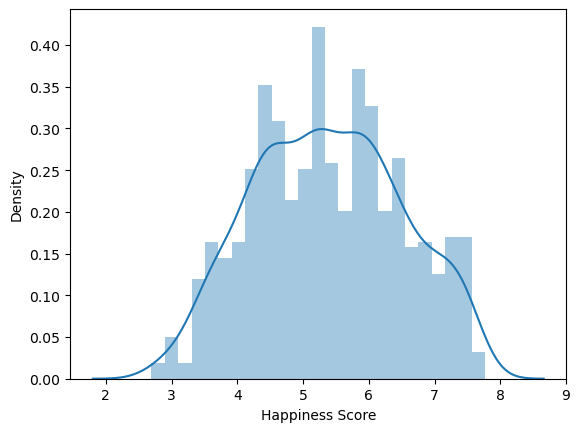

In [17]:
# Checking for extreme values in Happiness Score category
sns.distplot(df_happiness['Happiness Score'], bins=25)

In [18]:
df_happiness['Happiness Score'].mean()

5.379017902998669

In [19]:
df_happiness['Happiness Score'].median()

5.322

In [20]:
df_happiness['Happiness Score'].max()

7.769

####  No extreme values in Happiness Score category.

#  3.  Data prep for regression analysis

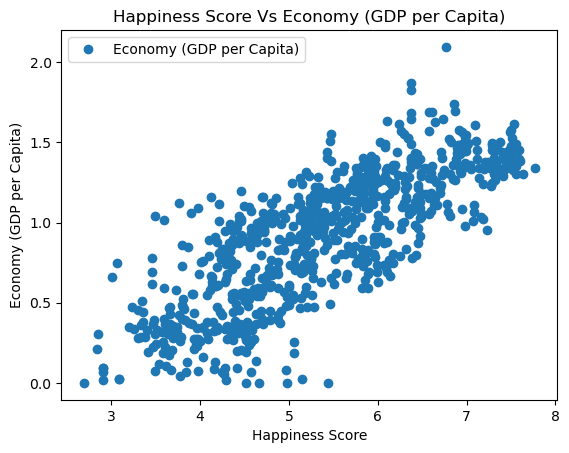

In [22]:
# Creating a scatterplot using matplotlib for another look at how the chosen variables plot against each other.
df_happiness.plot(x = 'Happiness Score', y='Economy (GDP per Capita)',style='o')
plt.title('Happiness Score Vs Economy (GDP per Capita)')  
plt.xlabel('Happiness Score')  
plt.ylabel('Economy (GDP per Capita)')  
plt.show()

In [23]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df_happiness['Happiness Score'].values.reshape(-1,1)
y = df_happiness['Economy (GDP per Capita)'].values.reshape(-1,1)

In [24]:
X

array([[7.587     ],
       [7.561     ],
       [7.527     ],
       [7.522     ],
       [7.427     ],
       [7.406     ],
       [7.378     ],
       [7.364     ],
       [7.286     ],
       [7.284     ],
       [7.278     ],
       [7.226     ],
       [7.2       ],
       [7.187     ],
       [7.119     ],
       [6.983     ],
       [6.946     ],
       [6.94      ],
       [6.937     ],
       [6.901     ],
       [6.867     ],
       [6.853     ],
       [6.81      ],
       [6.798     ],
       [6.786     ],
       [6.75      ],
       [6.67      ],
       [6.611     ],
       [6.575     ],
       [6.574     ],
       [6.505     ],
       [6.485     ],
       [6.477     ],
       [6.455     ],
       [6.411     ],
       [6.329     ],
       [6.302     ],
       [6.298     ],
       [6.295     ],
       [6.269     ],
       [6.168     ],
       [6.13      ],
       [6.123     ],
       [6.003     ],
       [5.995     ],
       [5.987     ],
       [5.984     ],
       [5.975

In [25]:
y

array([[1.39651   ],
       [1.30232   ],
       [1.32548   ],
       [1.459     ],
       [1.32629   ],
       [1.29025   ],
       [1.32944   ],
       [1.33171   ],
       [1.25018   ],
       [1.33358   ],
       [1.22857   ],
       [0.95578   ],
       [1.33723   ],
       [1.02054   ],
       [1.39451   ],
       [0.98124   ],
       [1.56391   ],
       [1.33596   ],
       [1.30782   ],
       [1.42727   ],
       [1.26637   ],
       [1.36011   ],
       [1.04424   ],
       [1.52186   ],
       [1.06353   ],
       [1.32792   ],
       [1.10715   ],
       [1.69042   ],
       [1.27778   ],
       [1.05351   ],
       [1.17898   ],
       [1.06166   ],
       [0.91861   ],
       [0.9669    ],
       [1.39541   ],
       [1.23011   ],
       [1.2074    ],
       [1.29098   ],
       [1.55422   ],
       [0.99534   ],
       [1.21183   ],
       [0.76454   ],
       [0.74553   ],
       [0.63244   ],
       [1.16891   ],
       [1.27074   ],
       [1.24461   ],
       [0.864

In [26]:
# Split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#  4.  Regression analysis

In [27]:
# Create a regression object.
regression = LinearRegression()

In [28]:
regression.fit(X_train, y_train)

LinearRegression()

In [29]:
# Predict the values of y using X.
y_predicted = regression.predict(X_test)

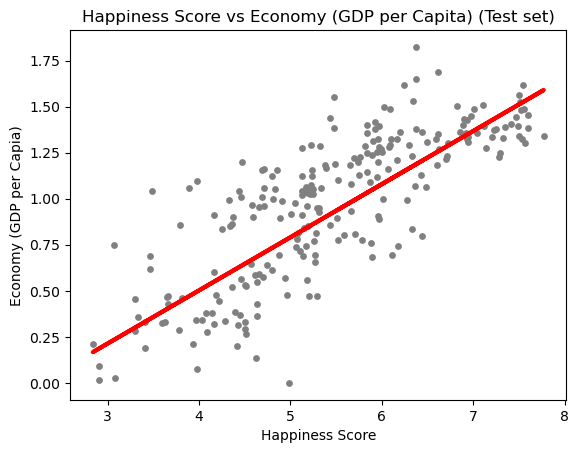

In [30]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Happiness Score vs Economy (GDP per Capita) (Test set)')
plot_test.xlabel('Happiness Score')
plot_test.ylabel('Economy (GDP per Capia)')
plot_test.show()

####  Q10.   The points in the scatterplot generally falls close to the trend line which shows a strong correlation and the trend line slopes upward left to right which indicates a a positive correlation between the two variables.  

In [31]:
# Creating objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 

In [32]:
# Printing the model summary statistics. 
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.28868066]]
Mean squared error:  0.06317074515719913
R2 score:  0.6045532311224681


####  The Mean squared error is lower which means the model is better at predicting the two values.  The R2 score is closer to 1 which suggests the trend line accounts for a large portion of the variability in the data and is a good fit.  

In [33]:
y_predicted

array([[0.94249581],
       [1.33539016],
       [1.17892521],
       [1.40265276],
       [0.43903672],
       [0.70202477],
       [0.61484324],
       [0.80854796],
       [1.34780343],
       [0.9318146 ],
       [1.21962922],
       [0.90323522],
       [0.30999647],
       [0.82702352],
       [0.18615246],
       [1.03198679],
       [0.55710713],
       [0.61080169],
       [0.73320231],
       [0.91507108],
       [1.18787435],
       [0.49504077],
       [0.70433424],
       [1.13706655],
       [1.25600298],
       [1.43411895],
       [1.0109131 ],
       [1.54150815],
       [0.40324034],
       [1.34607135],
       [1.18758567],
       [0.91507112],
       [1.03140943],
       [0.3319362 ],
       [1.4393152 ],
       [0.63389616],
       [0.23753762],
       [0.82673484],
       [1.10386831],
       [1.12811745],
       [0.64861888],
       [1.06922666],
       [1.12984953],
       [0.88678042],
       [1.46298701],
       [1.45086243],
       [0.97800351],
       [0.871

In [34]:
# Creating a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,1.101803,0.942496
1,1.398000,1.335390
2,1.530624,1.178925
3,1.394510,1.402653
4,0.285200,0.439037
5,1.156873,0.702025
6,0.385000,0.614843
7,0.740370,0.808548
8,1.425390,1.347803
9,1.186490,0.931815


####  The predicted values are close to actual values when comparing the above.  I think this model is good at predicting if a country has a high Economy (GDPper Capita) score then the country will have a higher happiness score.  Some possible bias's could be Selection bias since we're not sure if any particular group of people were excluded from participating happiness survey.  This may result in the model not accurately capturing the realtionship between the variables.  Reponse bias may occur if respondents provided inaccurate or biased responses in the survey.  Such as citizens are afraid to provide low scores and be retaliated against.  